# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Library/Python/2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Loading the data:

In [21]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcvct'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

/Users/Egor/Dropbox/Projects/mc/data/mcvct/mcvct_p0_s1_2016-10-18_1556
/Users/Egor/Dropbox/Projects/mc/data/mcvct/mcvct_p1_s1_2016-10-25_1101
/Users/Egor/Dropbox/Projects/mc/data/mcvct/mcvct_p1_s2_2016-10-25_1110
/Users/Egor/Dropbox/Projects/mc/data/mcvct/mcvct_p1_s3_2016-10-25_1125
(384, 39)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat',
       u'fovGap', u'fovFade', u'periGap', u'periFade', u'trialT', u'nFrames',
       u'nNa', u'nf000', u'nf090', u'nf180', u'nf270', u'pd000', u'pd090',
       u'pd180', u'pd270', u'qnResp', u'ringSz'],
      dtype='object')


Transforming the data set first.

In [22]:
ds['vDiffR'] = ds['vR'] - ds['vL']
ds['nfR'] = ds['nf000'] - ds['nf180']
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
ds.ix[ds['dirL']==0,'v000'] = ds['vL']
ds.ix[ds['dirR']==0,'v000'] = ds['vR']
ds.ix[ds['dirL']==180,'v180'] = ds['vL']
ds.ix[ds['dirR']==180,'v180'] = ds['vR']
print ds.head(5)
#df = pd.melt(ds, id_vars=['trialN','dirL','dirR','vL','vR','colorNameL','colorNameR','fovGap'],
#             value_vars=['pd000','pd090','pd180','pd270'])
#df = df.rename(columns={'variable': 'angle', 'value': 'predominance'})
#print df.head(5)

RangeIndex(start=0, stop=384, step=1)
     expName             time  participant  session  trialN  dirL  dirR   vL  \
0  mcvct_bv0  2016-10-18_1556            0        1       1   180     0  0.6   
1  mcvct_bv0  2016-10-18_1556            0        1       2     0   180  1.2   
2  mcvct_bv0  2016-10-18_1556            0        1       3     0   180  4.8   
3  mcvct_bv0  2016-10-18_1556            0        1       4     0   180  4.8   
4  mcvct_bv0  2016-10-18_1556            0        1       5     0   180  2.4   

    vR  szL ...      pd000  pd090  pd180     pd270  qnResp      ringSz  \
0  4.8  256 ...   0.000000    0.0    0.0  0.016667       0   25.800000   
1  2.4  256 ...   0.016667    0.0    0.0  0.000000       0   99.514286   
2  9.6  256 ...   0.016667    0.0    0.0  0.000000       0  136.371429   
3  0.3  256 ...   0.000000    0.0    0.0  0.016667       0  136.371429   
4  0.0  256 ...   0.000000    0.0    0.0  0.016667       0  136.371429   

   vDiffR  nfR  v000 v180  
0     4.

## Visualization

These plots show the speed at which the directional predominance was indicated the most (in terms of proportion).

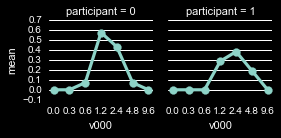

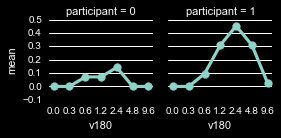

In [29]:
sumR = ds.groupby(['v000','participant'], as_index=False)['nf000'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumL = ds.groupby(['v180','participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
g = sns.factorplot(x='v000', y='mean', col='participant', data=sumR, size=2)
g = sns.factorplot(x='v180', y='mean', col='participant', data=sumL, size=2)

    v000  participant  sum      mean       std  size
0    0.0            0   12  1.000000  0.000000    12
1    0.0            1   26  0.722222  0.454257    36
2    0.3            0   14  1.000000  0.000000    14
3    0.3            1   32  0.761905  0.431081    42
4    0.6            0   13  0.928571  0.267261    14
5    0.6            1   32  0.761905  0.431081    42
6    1.2            0    4  0.285714  0.468807    14
7    1.2            1   19  0.452381  0.503761    42
8    2.4            0    5  0.357143  0.497245    14
9    2.4            1   15  0.357143  0.484966    42
10   4.8            0    9  0.642857  0.497245    14
11   4.8            1   18  0.428571  0.500870    42
12   9.6            0    7  0.500000  0.518875    14
13   9.6            1   23  0.547619  0.503761    42


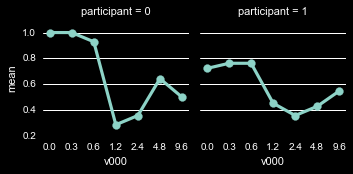

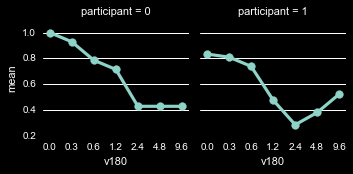

In [34]:
sumDR = ds.groupby(['v000','participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumDL = ds.groupby(['v180','participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print sumDR
#sumDR['nf270','v000'] = sumDR['v000']
#sumDL['nf270','v180'] = sumDL['v180']
g = sns.factorplot(x='v000', y='mean', col='participant', data=sumDR, size=2.5)
g = sns.factorplot(x='v180', y='mean', col='participant', data=sumDL, size=2.5)

Looking at the instances of when the ring occurred vs. when it didn't (proportion), and large was the resulting ring in those instances (mean ring size).

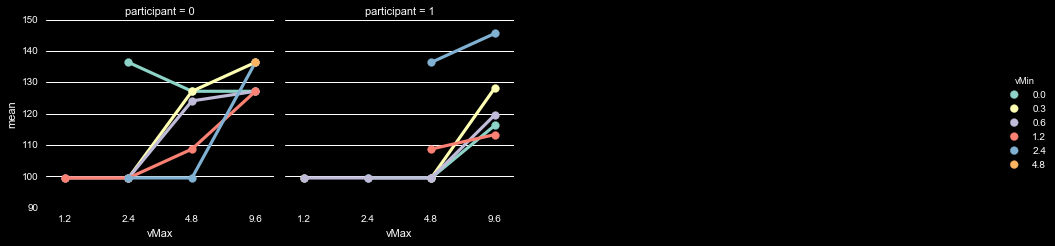

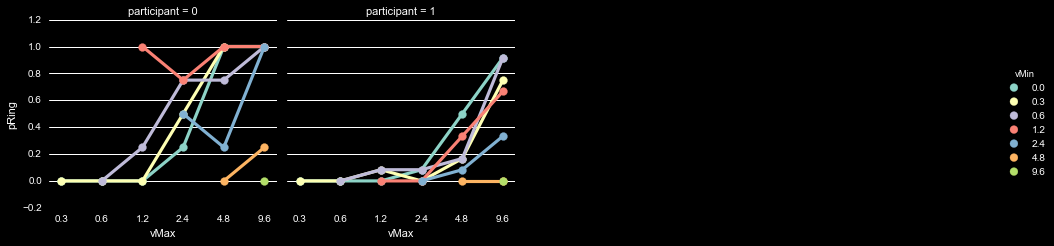

In [39]:
# Rewring the ring size column so that the minimum size is equated to zero:
ds.ix[ds['ringSz']==25.8,'ringSz'] = 0
# Creating columns for the slower and faster of the two speeds:
ds['vMin'] = np.amin([ds['vL'], ds['vR']], axis=0)
ds['vMax'] = np.amax([ds['vL'], ds['vR']], axis=0)
# Computing the proportion of instances when the ring has occurred:
sumMM_p = ds.groupby(['vMin','vMax','participant'],
                     as_index=False)['ringSz'].agg([np.count_nonzero, np.size]).reset_index()
sumMM_p['pRing'] = sumMM_p['count_nonzero'] / sumMM_p['size']
sumMM_p['vMin'] = sumMM_p['vMin']
sumMM_p['vMax'] = sumMM_p['vMax']
#print sumMM_p['ringSz']
# Getting the subset where the ring size is nonzero and computing the mean size:
ss = ds[ds.ringSz!=0]
sumMM_m = ss.groupby(['vMin','vMax','participant'], 
                     as_index=False)['ringSz'].agg([np.mean, np.std]).reset_index()
sumMM_m['vMin'] = sumMM_m['vMin']
sumMM_m['vMax'] = sumMM_m['vMax']
#print sumMM_m['ringSz']
# Plotting:
sns.factorplot(x='vMax', y='mean', hue='vMin', col='participant', data=sumMM_m, 
               col_wrap=4, size=3.5)
sns.factorplot(x='vMax', y='pRing', hue='vMin', col='participant', data=sumMM_p, 
               col_wrap=4, size=3.5)

# Eye-tracking data

## Data import

In [95]:
subjEtPath = glob.glob(allSubjDirs[0] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
#from cili.extract import extract_event_ranges
#ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr])
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr])
trials = pd.DataFrame({'trialN' : trialN, 'trialTS' : trialTS})
print trials.head(5)
# Creating my own ranges for each trial, with N number of samples:
nSamples = 1500
ranges = np.zeros((len(trialN),nSamples,6)) # 6 is for all six variables (L/R x,y,pup)
print trialTS[0]
#print samps.ix[samps.ix>trialTS[0],0]
#print samps.index
#print samps.ix[int(trialTS[0]):int(trialTS[0])+600]
#print trialN
trialStart = trialN # initiating a new variable to collect the 'actual' start
trialEnd = trialN # the 'actual' end
print trialN[-1] == 96
for t in trialN:
    print t
    #beg = int(trialTS[int(t)-1])
    # the actual start is the first data point following a trial time stamp:
    trialStart[t-1] = next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t-1])
    print t==trialN[-1]
    if t != 96: #trialN[-1]: #WHY DOESN'T THIS WORK?!
        trialEnd[t-1] = next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t])
    else:
        trialEnd[t-1] = samps.index[-1]
    #end = trialStart[t-1]+nSamples
    #print end
    #ranges[t,:,:] = samps.ix[beg:end]
    #samps.ix[int(trialTS[int(t)-1]):int(trialTS[int(t)-1]+nSamples)]
print trialStart
print trialEnd

/Users/Egor/Dropbox/Projects/mc/data/mcvct/mcvct_p0_s1_2016-10-18_1556/data.asc
          x_l    y_l   pup_l     x_r    y_r   pup_r
onset                                              
849896  946.6  353.0  6787.0  1108.2  353.0  6635.0
849898  946.6  353.0  6788.0  1108.3  353.0  6639.0
849900  946.9  353.0  6790.0  1108.4  353.0  6639.0
849902  946.9  353.0  6793.0  1108.5  353.0  6639.0
849904  946.6  353.0  6794.0  1108.5  353.0  6644.0
Index([u'x_l', u'y_l', u'pup_l', u'x_r', u'y_r', u'pup_r'], dtype='object')
   trialN  trialTS
0       1   849339
1       2   858364
2       3   864897
3       4   870742
4       5   875666
849339
True
1
False
2
False
3
False
4
False
5
False
6
False
7
False
8
False
9
False
10
False
11
False
12
False
13
False
14
False
15
False
16
False
17
False
18
False
19
False
20
False
21
False
22
False
23
False
24
False
25
False
26
False
27
False
28
False
29
False
30
False
31
False
32
False
33
False
34
False
35
False
36
False
37
False
38
False
39
False
40
False
41
